In [1]:
import cv2 as cv2
import matplotlib.pyplot as plt
import numpy as np

 <h1><center><font color='red'>thresholding</font></center></h1>

In [2]:
image  = cv2.imread('images/dog.jpeg',0)

In [3]:
def imshow(images):
    image_num = len(images)
    plt.figure(figsize=(10,10))
    for i in range(1,image_num+1):
        plt.subplot(1,image_num,i)
        plt.imshow(images[i-1],cmap='gray')

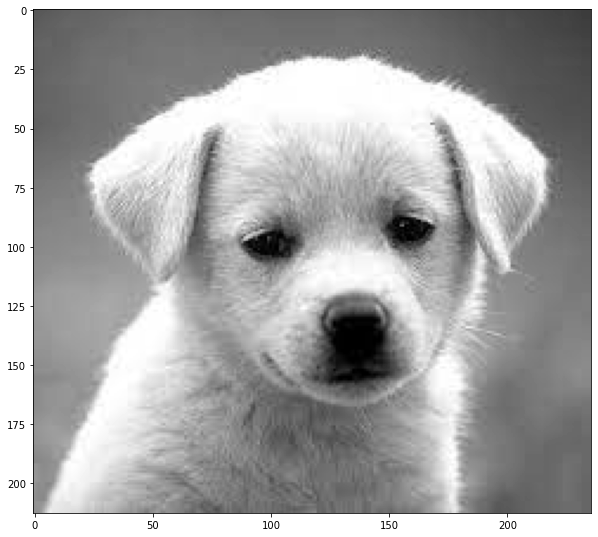

In [4]:
imshow([image])

In [5]:
thre,image_bin = cv2.threshold(image,100,255,cv2.THRESH_BINARY)

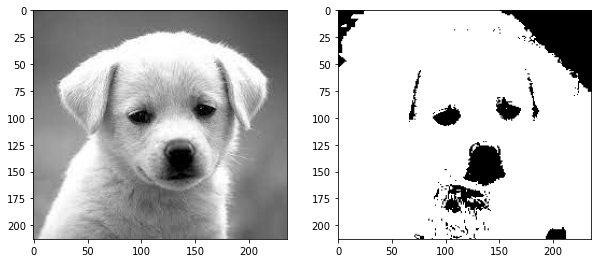

In [6]:
imshow([image,image_bin])

In [7]:
thre,image_bin = cv2.threshold(image,100,50,cv2.THRESH_BINARY_INV)

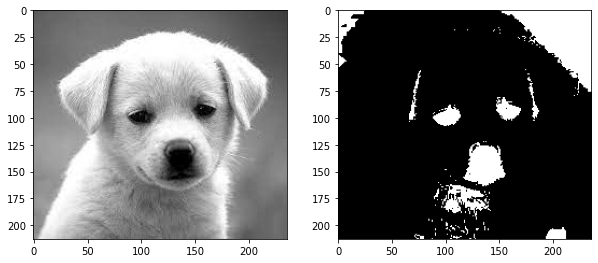

In [8]:
imshow([image,image_bin])

In [9]:
thre,image_bin = cv2.threshold(image,100,-1,cv2.THRESH_TRUNC)

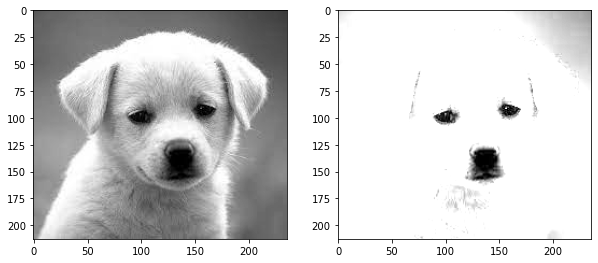

In [10]:
imshow([image,image_bin])

In [11]:
np.max(image_bin)

100

In [12]:
thre,image_bin = cv2.threshold(image,100,-1,cv2.THRESH_TOZERO)

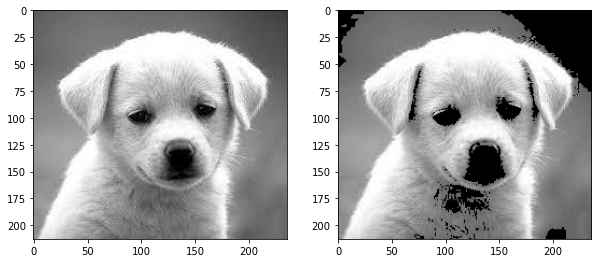

In [13]:
imshow([image,image_bin])

In [14]:
thre,image_bin = cv2.threshold(image,100,-1,cv2.THRESH_TOZERO_INV)

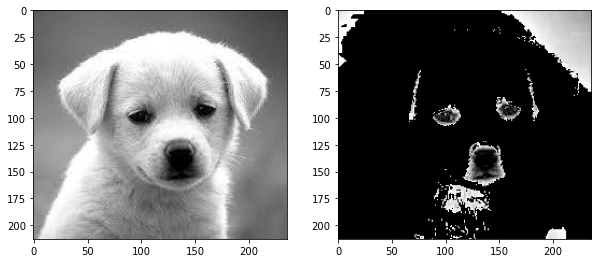

In [15]:
imshow([image,image_bin])

 <h1><center><font color='red'>otsu</font></center></h1>

In [16]:
image  = cv2.imread('./images/otsu.jpg',0)

In [17]:
thre,image_bin = cv2.threshold(image,-1,100,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

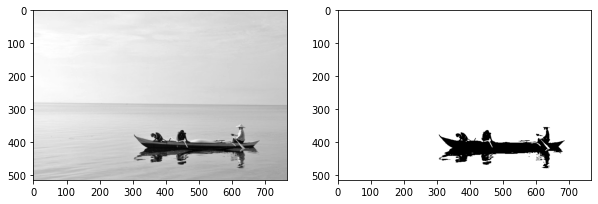

In [18]:
imshow([image,image_bin])

 <h1><center><font color='red'>morphological operations</font></center></h1>

In [19]:
image = cv2.imread('./images/ex_mor.png',0)

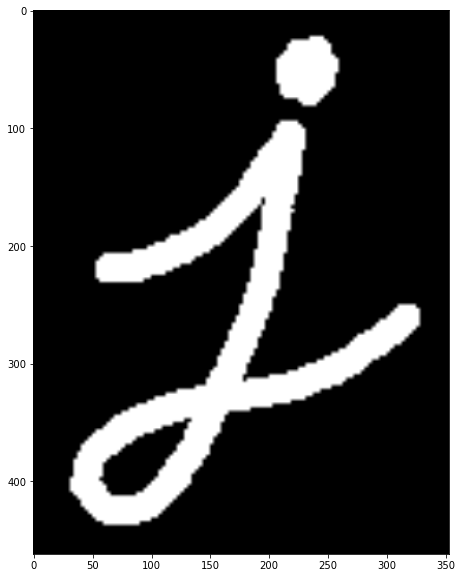

In [20]:
imshow([image])

In [21]:
str_el = np.ones((13,13)).astype(np.uint8)
out_image = cv2.dilate(image,str_el)

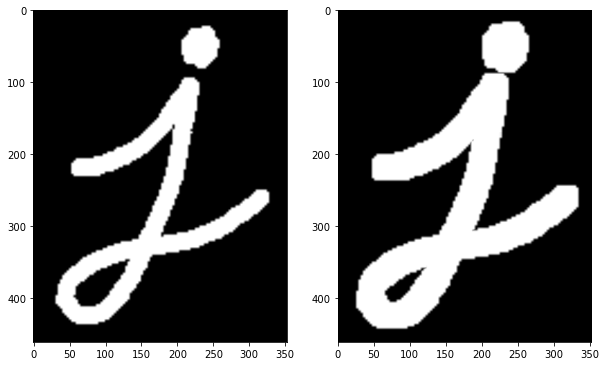

In [22]:
imshow([image,out_image])

In [23]:
str_el = np.ones((13,13)).astype(np.uint8)
out_image = cv2.erode(image,str_el)

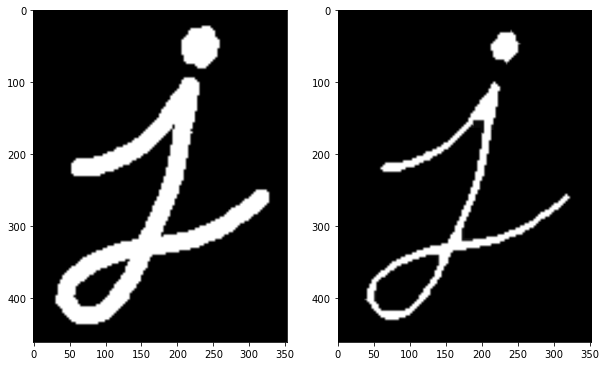

In [24]:
imshow([image,out_image])

In [25]:
image = cv2.imread('./images/opening_noise.png',0)

In [26]:
str_el = np.ones((5,5)).astype(np.uint8)
out_image = cv2.morphologyEx(image,cv2.MORPH_OPEN,str_el)

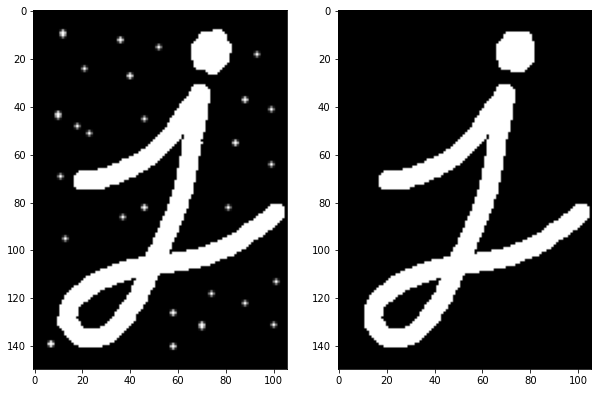

In [27]:
imshow([image,out_image])

In [28]:
image = cv2.imread('./images/closing _noise.png',0)

In [29]:
str_el = np.ones((5,5)).astype(np.uint8)
out_image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,str_el)

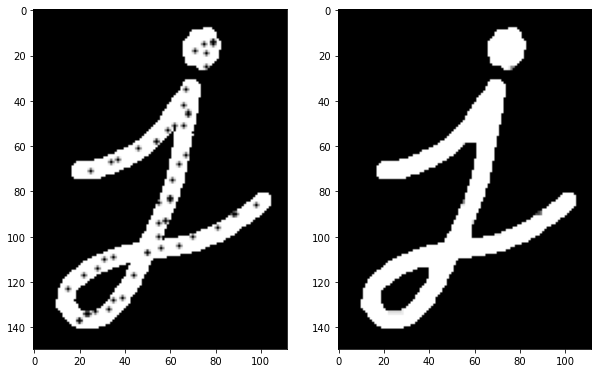

In [30]:
imshow([image,out_image])

In [31]:
image = cv2.imread('./images/line_mor_new.png',0)

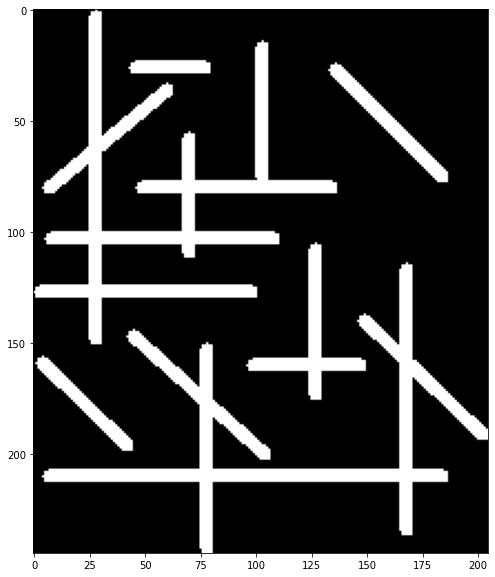

In [32]:
imshow([image])

In [33]:
str_el = np.ones((11,1))
out_image = cv2.morphologyEx(image,cv2.MORPH_OPEN,str_el)

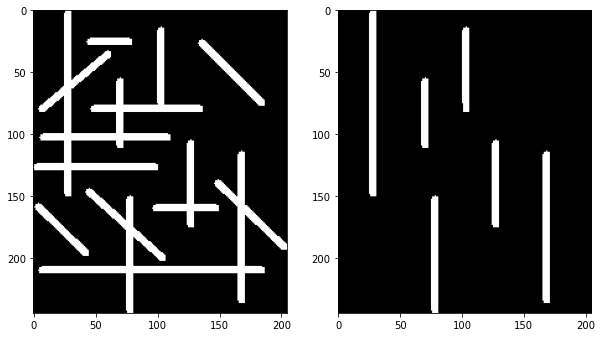

In [34]:
imshow([image,out_image])

 <h1><center><font color='red'>connected components</font></center></h1>

In [35]:
image = cv2.imread('./images/plate.png',0)

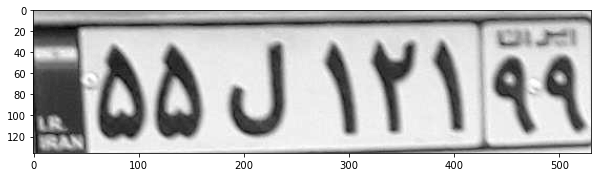

In [36]:
imshow([image])

In [37]:
thre,image_bin = cv2.threshold(image,-1,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

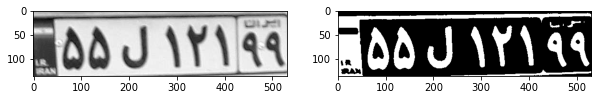

In [38]:
imshow([image,image_bin])

In [39]:
out_put = cv2.connectedComponentsWithStats(image_bin,8,cv2.CV_32S)

In [40]:
(numLabels, labels, stats, centroids) = out_put

In [41]:
mask = np.zeros_like(image)
for i in range(numLabels):
    h = stats[i,2]
    w = stats[i,3]
    if h > w:
        componentMask = (labels == i).astype("uint8") * 255
        mask = cv2.bitwise_or(mask,componentMask)

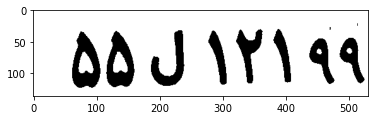

In [42]:
plt.imshow(mask,cmap='gray')

 <h1><center><font color='red'>watershwld</font></center></h1>

In [43]:
image_rgb = cv2.imread('./images/markers1.jpg')
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_BGR2GRAY)

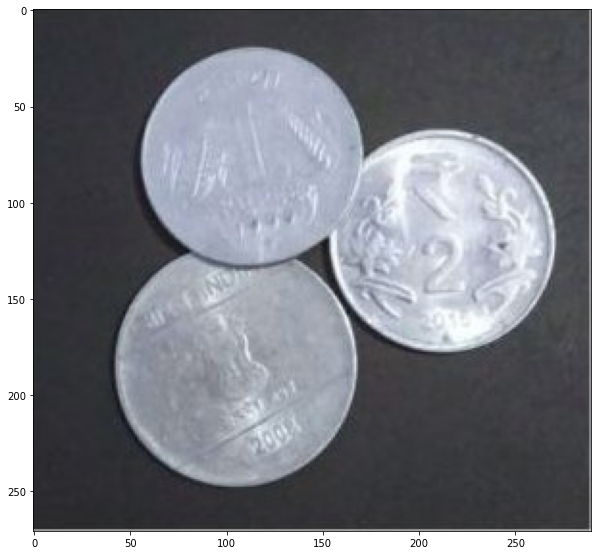

In [44]:
imshow([image_rgb])

In [45]:
the , image_bin = cv2.threshold(image_gray,-1,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

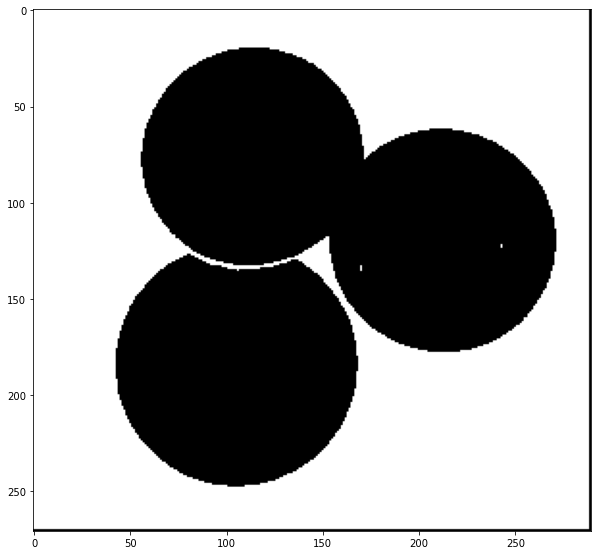

In [47]:
imshow([image_bin])

In [48]:
kernel = np.ones((3,3),np.uint8)
image_denoise = cv2.morphologyEx(image_bin,cv2.MORPH_OPEN,kernel)

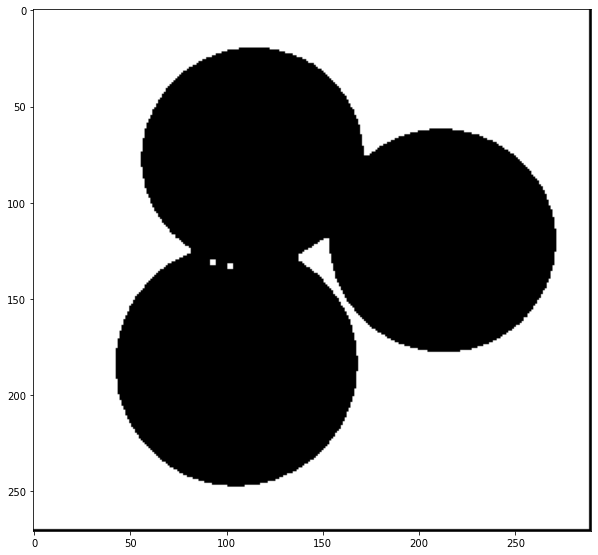

In [49]:
imshow([image_denoise])

In [50]:
sure_back = cv2.dilate(image_denoise,kernel)

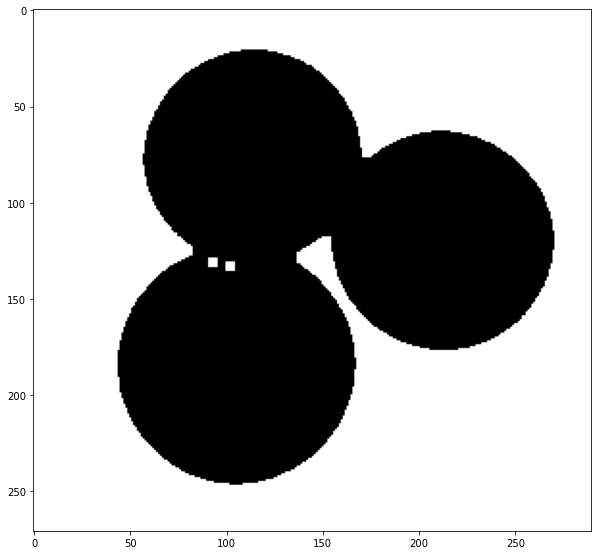

In [51]:
imshow([sure_back])

In [54]:
dst = cv2.distanceTransform(image_bin,cv2.DIST_L2,5)

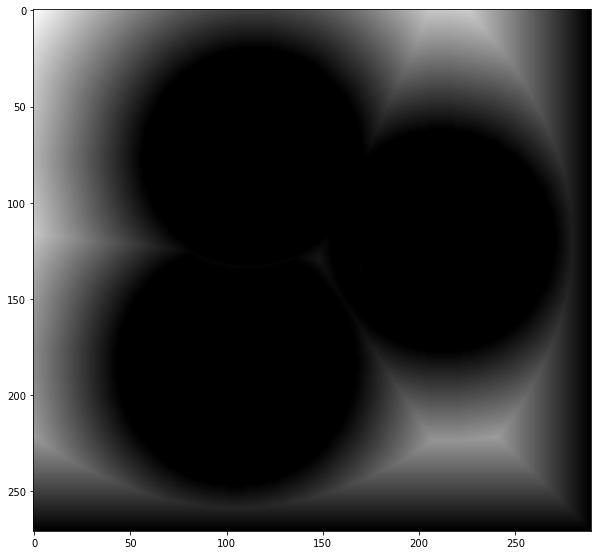

In [55]:
imshow([dst])

In [56]:
th,sure_fg = cv2.threshold(dst,0.7*np.max(dst),255,cv2.THRESH_BINARY)

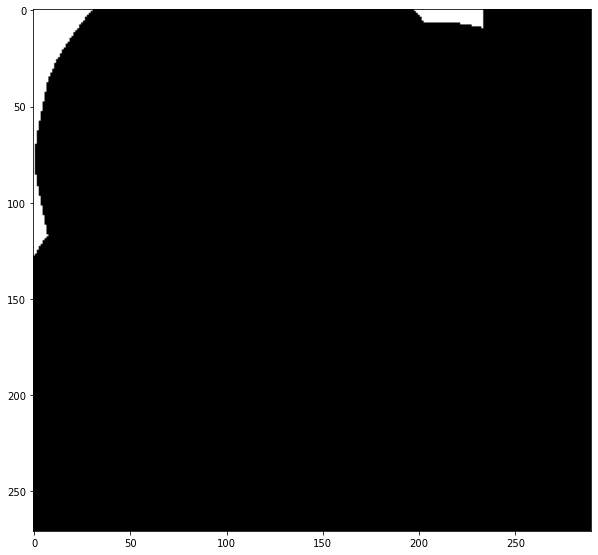

In [57]:
imshow([sure_fg])

In [58]:
edge = np.subtract(sure_back.astype(np.uint8),sure_fg.astype(np.uint8))

In [59]:
label,markers = cv2.connectedComponents(sure_fg.astype(np.uint8))

In [60]:
markers +=1

In [61]:
markers[unknown==255] = 0

NameError: name 'unknown' is not defined

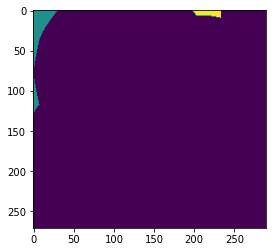

In [62]:
plt.imshow(markers)

In [63]:
markers = cv2.watershed(image_rgb,markers)

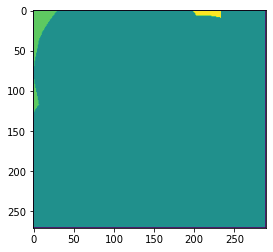

In [64]:
plt.imshow(markers)